# Bozza Random forest

Random forest fatta così non ha un cazzo di senso.
Avrà senso aggiungere la Z insieme ai dati e fare un unico grande dataset.
Dopodiche si può fare PCA, per scartare le componenti a due a due mega correlate, visto che rappresenteranno più o meno la stessa grandezza fisica.
Così possiamo ridurre il numero di features e rimane computaizonemlmente meno intensivo.

Altra cosa Mrem secondo me è una buona feature che racchiude varie cose, Dipende da Z, natal kick, m1, m2.

#### qui sopra non si è mai trattato di metallicità. qui sotto inserisco la metallicità in ogni dataset e li unisco tutti e rifaccio l'algoritmo

In [3]:
import pandas as pd
import polars as pl
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
heade = ['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick', 'Mrem', 'Srem', 'esca_v', 'Mcluster', 'gen']

path_data = './data/'
dyn = '/Dyn/' # Direi che così è facilmente customizzabile per come ogni autistic* si è sistemato i files.
cols = [1,2,3,4,9,13,14,15,16,17,25,27]


In [5]:
def extractor(path_data, cluster):
    data = pd.DataFrame()
    wichcluster = os.listdir(path_data) #check what your pc does here
    #print(wichcluster)
    if cluster == 'gc':
        cluster = wichcluster[2]
    if cluster == 'nsc':
        cluster = wichcluster[1]
    if cluster == 'ysc':
        cluster = wichcluster[0]
    for i in os.listdir(path_data + cluster + dyn):
        #print(i)
        name = path_data + cluster + dyn + str(i) + '/nth_generation.txt'
        #print(name)
        dataZ=pd.read_csv(name, delimiter=' ', skiprows=1, usecols=cols, names=heade)#, names=heade)
        #dataZ.drop(dataZ.columns[[0, 5, 6, 7, 8, 10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 24, 26]], axis=1, inplace=True)
        #dataZ.columns = heade
        dataZ['Z'] = float(i)
        data = pd.concat([data, dataZ])
    return data

### ML 

##### Ho pensato che feature che sono importanti da usare come target sono la massa del buco nero, quale caratteristica è più identificativa di un buco nero del resto, ma anche la feature GEN, generazione del buco nero. ci interessa anche questa.

RFR: 0.985163398512086
Mean Absolute Error (MAE): 3.878491921253717
Mean Squared Error (MSE): 30.855784335924476
Root Mean Squared Error (RMSE): 5.5547983164039785
R² Score: 0.985163398512086


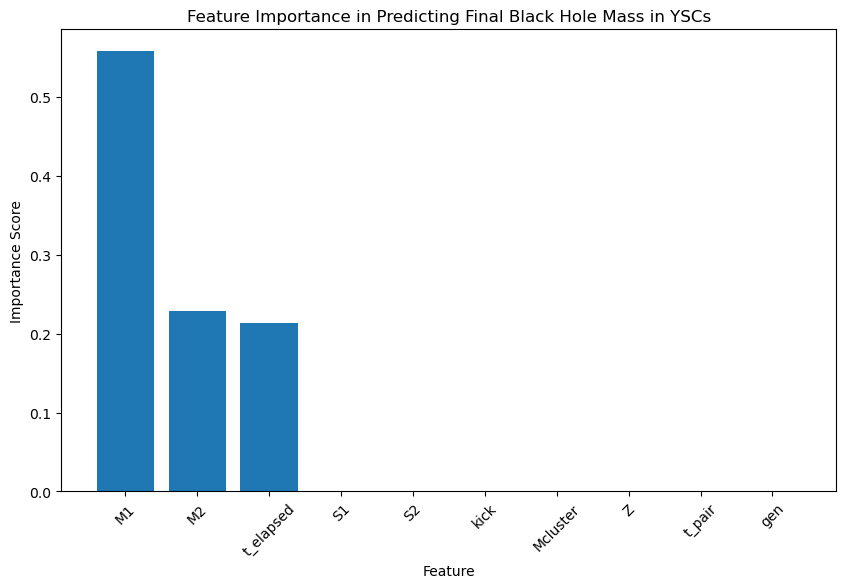

In [6]:
dataysc = extractor(path_data, 'ysc')
df = pl.from_pandas(dataysc).drop('Srem', 'esca_v')
del dataysc


colonne = list(df.columns)

targetcol = str('Mrem')

X = df.drop(targetcol)
y = df[targetcol]
colonne.remove(targetcol)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=6)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', model)])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)

print(f"RFR: {r2}") 
#Prediction on test set
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse ** 0.5}")
print(f"R² Score: {r2}")

feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = colonne

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Predicting Final Black Hole Mass in YSCs")
plt.show()




RFR: 0.9763562296732019
Mean Absolute Error (MAE): 4.48091318845457
Mean Squared Error (MSE): 45.547253348457325
Root Mean Squared Error (RMSE): 6.748870523906747
R² Score: 0.9763562296732019


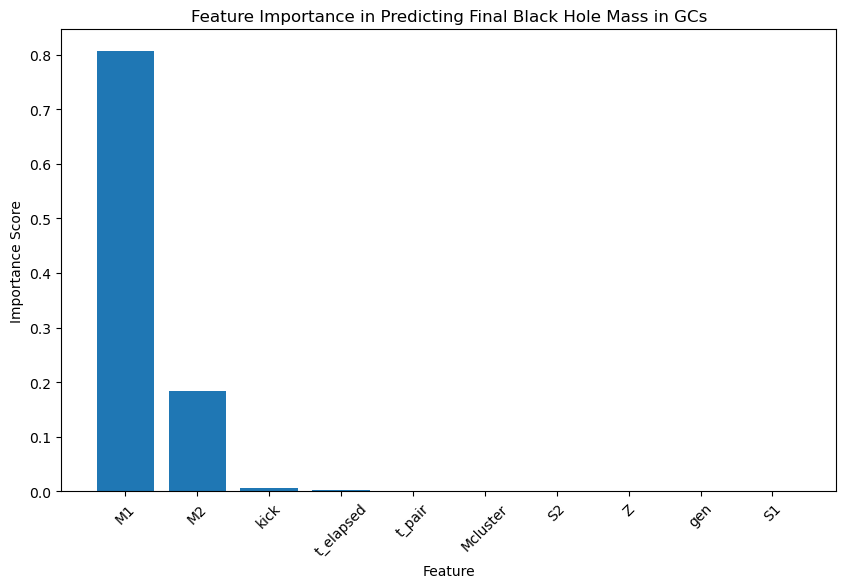

In [7]:
datagc = extractor(path_data, 'gc')

df = pl.from_pandas(datagc).drop('Srem', 'esca_v')
del datagc

# Assign column names
colonne = list(df.columns)


targetcol = str('Mrem')

X = df.drop(targetcol)
y = df[targetcol]
colonne.remove(targetcol)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, max_depth=5 , random_state=42, n_jobs=6)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', model)])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)

print(f"RFR: {r2}") # RFR: 0.811299774049597

#Prediction on test set
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse ** 0.5}")
print(f"R² Score: {r2}")

feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = colonne

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Predicting Final Black Hole Mass in GCs")
plt.show()

RFR: 0.9941722169355255
Mean Absolute Error (MAE): 2.8844839320900335
Mean Squared Error (MSE): 19.995868481554794
Root Mean Squared Error (RMSE): 4.471674013337152
R² Score: 0.9941722169355255


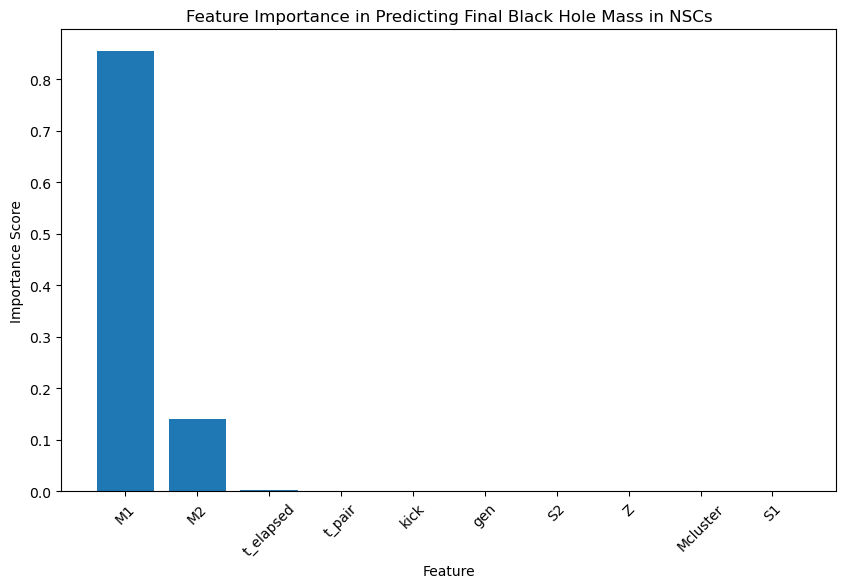

In [9]:

datansc = extractor(path_data, 'nsc')
df = pl.from_pandas(datansc).drop('Srem', 'esca_v')
del datansc

# Assign column names
colonne = list(df.columns)


targetcol = str('Mrem')

X = df.drop(targetcol)
y = df[targetcol]
colonne.remove(targetcol)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=42, n_jobs=6)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', model)])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)

print(f"RFR: {r2}") # RFR: 0.811299774049597

#Prediction on test set
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse ** 0.5}")
print(f"R² Score: {r2}")

feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = colonne

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Predicting Final Black Hole Mass in NSCs")
plt.show()

In [10]:
## Interessante. Lo spin si riferisce a una componente dello spin che è perpendicolare al piano orbitale del sistema. Di conseguenza alto spin comporta una o più
# perturbazioni di una certa entità, ergo, interazioni dinamiche con altri oggetti del cluster. E' chiaro che maggiori sono le interazioni maggiori sono le possibilità di merge
# Stessa cosa è T-elapsed. CHè è il tempo che passa dalla formazione dei genitori di prima generazione al BH di n-esima generazione. Più tempo passa più sono probabili interazioni 
#dinamiche e merge gerarchici.
# Z sappiamo bene che è parte integrante della funzione di massa dei buchi neri.
# Escape velocity può essere importante come indicatore di permamenza nel cluster.

In [11]:
## Come prima La componente di spin perpendicolare al piano orbitale è forte indicatore di interazioni con altri elementi del cluster. è più importante S1 rispetto a S2
# probabilmente perchè perturbare il corpo primario, non lo so.
# Mrem è chiaro invece dai.

RFR: 0.9971103160726295
Mean Absolute Error (MAE): 8.042895442359256e-05
Mean Squared Error (MSE): 9.651474530831116e-06
Root Mean Squared Error (RMSE): 0.003106682238470989
R² Score: 0.9971103160726295


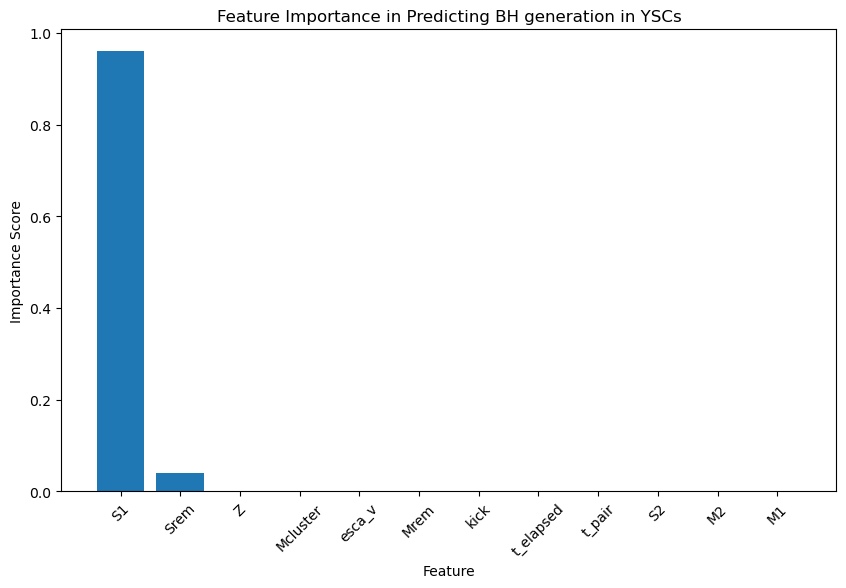

In [12]:
dataysc = extractor(path_data, 'ysc')
df = pl.from_pandas(dataysc)#.drop()
del dataysc


colonne = list(df.columns)

targetcol = str('gen')

X = df.drop(targetcol)
y = df[targetcol]
colonne.remove(targetcol)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=6)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', model)])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)

print(f"RFR: {r2}") 
#Prediction on test set
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse ** 0.5}")
print(f"R² Score: {r2}")

feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = colonne

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Predicting BH generation in YSCs")
plt.show()


RFR: 0.9861588791418981
Mean Absolute Error (MAE): 0.0004363356596516425
Mean Squared Error (MSE): 0.00021057086173471187
Root Mean Squared Error (RMSE): 0.014511059979708989
R² Score: 0.9861588791418981


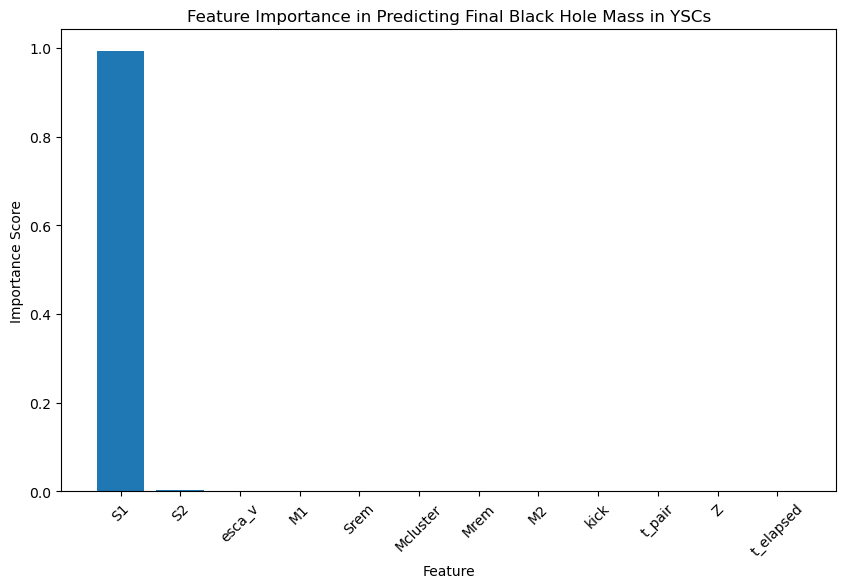

In [13]:
datagc = extractor(path_data, 'gc')
df = pl.from_pandas(datagc)#.drop('Srem', 'esca_v')
del datagc


colonne = list(df.columns)

targetcol = str('gen')

X = df.drop(targetcol)
y = df[targetcol]
colonne.remove(targetcol)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=6)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', model)])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)

print(f"RFR: {r2}") 
#Prediction on test set
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse ** 0.5}")
print(f"R² Score: {r2}")

feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = colonne

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Predicting Final Black Hole Mass in YSCs")
plt.show()




RFR: 0.9596592257076223
Mean Absolute Error (MAE): 0.008766748766180263
Mean Squared Error (MSE): 0.004640735371584257
Root Mean Squared Error (RMSE): 0.06812294306314325
R² Score: 0.9596592257076223


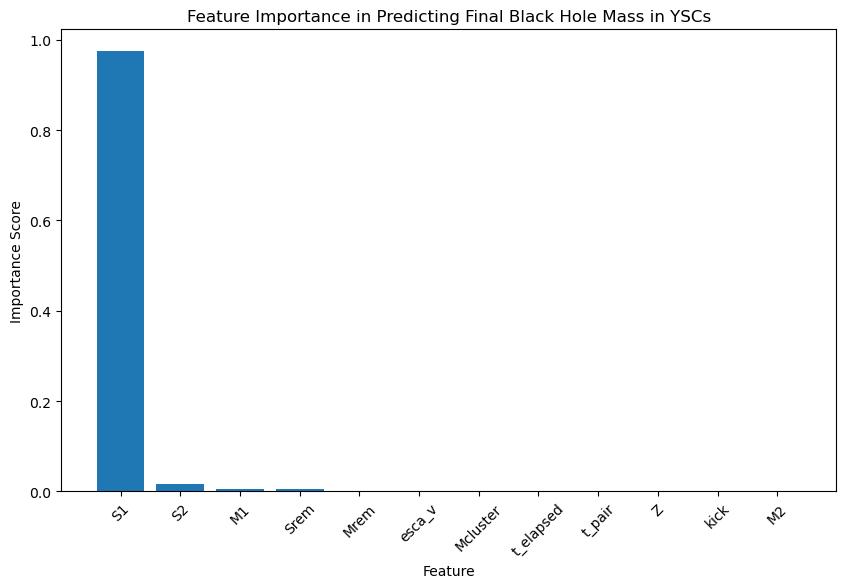

In [15]:
datansc = extractor(path_data, 'nsc')
df = pl.from_pandas(datansc)#.drop('Srem', 'esca_v')
del datansc


colonne = list(df.columns)

targetcol = str('gen')

X = df.drop(targetcol)
y = df[targetcol]
colonne.remove(targetcol)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=6)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', model)])

pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)

print(f"RFR: {r2}") 
#Prediction on test set
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse ** 0.5}")
print(f"R² Score: {r2}")

feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = colonne

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Predicting Final Black Hole Mass in YSCs")
plt.show()




In [ ]:
Classifier si può fare con quelli che escono / non escono

#### PCA

In [ ]:
def normer_col(df,i):
    media = df[i].mean()
    std = df[i].std()
    coso = (df[i] - media)/std
    return coso

0.7445131365441531


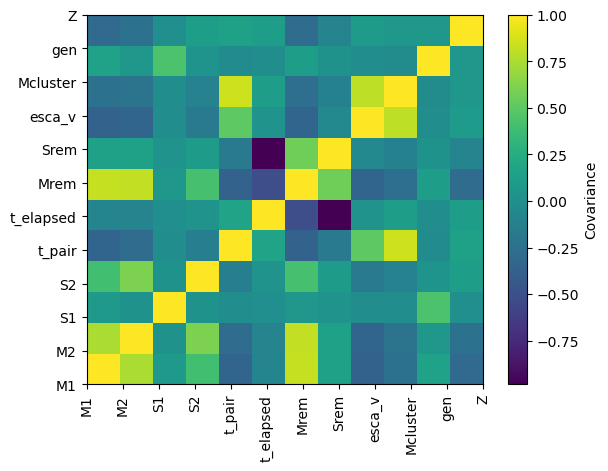

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
heade = list(df.columns)
matrix = np.zeros((len(heade), len(heade)))
for i in heade:
    a = heade.index(i)
    inorm = normer_col(df,i)
    for j in heade:
        #if i !=j:
        b = heade.index(j)
        jnorm = normer_col(df,j)
        #print(i,j)            
        c = np.cov(inorm, jnorm)[0,1]
        if i=='M1' and j =='M2':
            print(c)
        #print(np.cov(inorm, jnorm)[0,1])
        matrix[b,a] = c
            
x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
x = x.flatten()
y = y.flatten()
values = matrix.flatten()

ticks = np.linspace(-0.5,11.5,1)
# Create a 2D histogram
plt.hist2d(x,y, weights=values, bins=(matrix.shape[1], matrix.shape[0]), cmap='viridis')
plt.colorbar(label='Covariance')
plt.xticks(ticks=np.arange(len(heade)), labels=heade, rotation=90)  # Tick for each bin, labeled with `heade`
plt.yticks(ticks=np.arange(len(heade)), labels=heade)
#plt.ylabel(heade.index())
plt.show()


Ora , siccome alta correlazione significa che le quantità indicano più o meno la stessa grandezza e viceversa bassissima sono l'una l'inverso dell'altra, seleziono le features che hanno una correlazione compresa tra abs(0.6).
Tipo si vede che M1 e M2 hanno la stessa identica relaziono con praticamente tutte le quantità, E sono fortemente correlate con Mrem, per cui si potrebbe ridurre le features tralasciando M2 e M1 e tenendo Mrem.  S1 ha una correlazione nulla con ciascuna feature, per cui non sembra eliminabile; stessa cosa per S2. 
Per Z vediamo che corrisponde alla teoria, è inversamente proporzionale alle masse e alla massa del remnant. Il t_pair, tempo di accoppiamento è giustamente inversamente proporzionale alle masse.
T_elapsed non lo so perchè sia fortemente inv-correlato con lo spin del remnant. Escape velocity è inversamente correlato alle singole masse e direttamente alla massa totale. La generazione del buco nero è debolmente correlata a tutto, tranne che allo spin. NOn so a livello fisico cosa faccia lo spin però.

In [ ]:
todo : aggiungere escape velocity

In [ ]:
# Siccome M1,M2 sono estremamnte correlate magari prendere il rapporto tra le due potrebbe essere interessante


In [ ]:
def normer_col(df,i):
    media = df[i].mean()
    std = df[i].std()
    coso = (df[i] - media)/std
    return coso

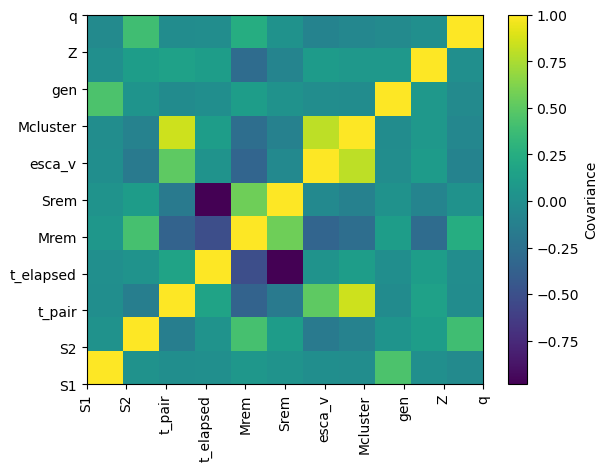

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
heade = list(df.columns)
matrix = np.zeros((len(heade), len(heade)))
for i in heade:
    a = heade.index(i)
    inorm = normer_col(df,i)
    for j in heade:
        #if i !=j:
        b = heade.index(j)
        jnorm = normer_col(df,j)
        #print(i,j)            
        c = np.cov(inorm, jnorm)[0,1]
        if i=='M1' and j =='M2':
            print(c)
        #print(np.cov(inorm, jnorm)[0,1])
        matrix[b,a] = c
            
x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
x = x.flatten()
y = y.flatten()
values = matrix.flatten()

ticks = np.linspace(-0.5,11.5,1)
# Create a 2D histogram
plt.hist2d(x,y, weights=values, bins=(matrix.shape[1], matrix.shape[0]), cmap='viridis')
plt.colorbar(label='Covariance')
plt.xticks(ticks=np.arange(len(heade)), labels=heade, rotation=90)  # Tick for each bin, labeled with `heade`
plt.yticks(ticks=np.arange(len(heade)), labels=heade)
#plt.ylabel(heade.index())
plt.show()


#### PCA

scegliere una perentuale di varianza del dataset e la pca ti mantiene quello.